# DSCI510 FINAL PROJECT by Dhandeep Suglani


***Data Analysis and Visualization***

--- 
#### Below are the visuals from the generated CSV File that has been through web scraping these sites:

**Sources**

https://www.worldometers.info/co2-emissions/co2-emissions-by-country/

https://www.iqair.com/us/world-most-polluted-countries

https://www.worldometers.info/gdp/gdp-percapita/#:~:text=Gross%20Domestic%20Product%20(GDP)%20per,the%20Nominal%20GDP%20per%20capita.



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## Kind of Analysis
I decided to analyze the relationship and correaltion using the pearson correaltion coeffecient.For my visuals, I included an interactive pie chart that depicts the top 20 global leaders in C02 Emissions. After, I compare the pollution score and CO2 emissions of the top 5 CO2 emissions in the world to find insights regardings their respective pollution and emissions. Finally, I decided to create a scatterplot that analyzed the Real GDP Per capita and pollution of the countries.   


## Read CSV into Pandas Dataframe
Creating dataframes for top 5 and top 20 in CO2 Emissons

In [21]:
df = pd.read_csv("data/cntryinfo.csv")
df_s = df.sort_values(by =  "CO2_emis_2016", ascending = False)
df_f = df_s.head(5)
df_20 = df_s.head(20)
df.head()

,Country,CO2_emis_2016,Poll_2021,GDP_Per_Cap
0,China,29.18,32.6,16842.0
1,United States,14.02,10.3,59928.0
2,India,7.09,58.1,7166.0
3,Russia,4.65,12.3,25763.0
4,Japan,3.47,9.1,42067.0


**Correlation between CO2 AND POLLUTION**

In [13]:
corrdf = df[['CO2_emis_2016', 'Poll_2021']]
corrdf.corr(min_periods=3)

,CO2_emis_2016,Poll_2021
CO2_emis_2016,1.000000,0.053336
Poll_2021,0.053336,1.000000


**Correlation between CO2 and GDP per Cap**

In [20]:
corrd = df[['CO2_emis_2016', 'GDP_Per_Cap']]
corrd.corr(min_periods=3)

,CO2_emis_2016,GDP_Per_Cap
CO2_emis_2016,1.000000,0.040108
GDP_Per_Cap,0.040108,1.000000


**Correlation between CO2 and GDP per Cap**

In [19]:
corrd = df[['GDP_Per_Cap', 'Poll_2021']]
corrd.corr(min_periods=3)

,GDP_Per_Cap,Poll_2021
GDP_Per_Cap,1.000000,-0.322456
Poll_2021,-0.322456,1.000000


## Data Visualization

**Interactive Pie Chart of Global Leaders in CO2 Emissons**

In [15]:
fig = px.pie(df_20, values='CO2_emis_2016', names='Country', title='Top 20 Countries in CO2 Emission')
fig.show()

**Stacked Barchart for top 5 countries in CO2, and how they are affected by their CO2 Emiss on thier Pollution Level**

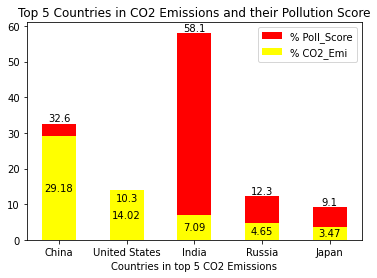

In [18]:
barWidth = .5

p1 = plt.bar(df_f["Country"], df_f["Poll_2021"], width=barWidth, color='red')
p2 = plt.bar(df_f["Country"], df_f["CO2_emis_2016"], width=barWidth, color='yellow')

#plt.ylabel('')
plt.xlabel('Countries in top 5 CO2 Emissions')
plt.title('Top 5 Countries in CO2 Emissions and their Pollution Score')
plt.legend((p1[0], p2[0]), ('% Poll_Score', '% CO2_Emi'))


plt.bar_label(p1)
plt.bar_label(p2, label_type='center')   
    
#display chart
plt.show()

**Scatterplot representing how GDP effects Pollution Levels**

<AxesSubplot:xlabel='Poll_2021', ylabel='GDP_Per_Cap'>

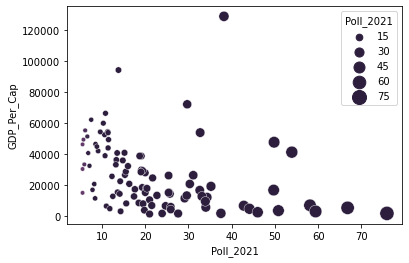

In [17]:
sns.scatterplot(
    data=df, x="Poll_2021", y="GDP_Per_Cap", hue="Poll_2021", size="Poll_2021",
    sizes=(20, 200), hue_norm=(0, 7)
)